In [23]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# request library
import requests 
from config import weather_api_key  # key

from datetime import datetime

In [33]:
# ramdom set of lat and long combos
lats = np.random.uniform(low=-90.000, high=90.000, size=1400)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1400)

lats_lngs = zip(lats, lngs)
lats_lngs

# add lats_lngs into a list
cord = list(lats_lngs)

In [34]:
# hold all the cities
cities = []
# Identify the nearest city for each lat and long combo
for items in cord:
    city = citipy.nearest_city(items[0],items[1]).city_name
    
    #if city is unique, then add it to the cities list
    if city not in cities:
        cities.append(city)

# print the city count to comfirm
len(cities)

578

In [35]:
# starting URL for Weather Map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [36]:
# create empty list to gold the weather data
city_data = []

# Print the begninning of the logging
print("Beginning Data Retrieval")
print("------------------------")

# create counters.
record_count = 1
set_count = 1

# loop through all the cities in our list 
for i, city in enumerate(cities):
    
    # group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count += 1
        
    # create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record and set the numbers and the city.
    print(f"Processing Record {record_count} of set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval
------------------------
Processing Record 1 of set 1 | koumac
Processing Record 2 of set 1 | rikitea
Processing Record 3 of set 1 | yellowknife
Processing Record 4 of set 1 | kem
Processing Record 5 of set 1 | nizhneyansk
City not found. Skipping...
Processing Record 6 of set 1 | busselton
Processing Record 7 of set 1 | santa cruz de tenerife
Processing Record 8 of set 1 | bokoro
Processing Record 9 of set 1 | tasiilaq
Processing Record 10 of set 1 | attawapiskat
City not found. Skipping...
Processing Record 11 of set 1 | aleksandrovsk-sakhalinskiy
Processing Record 12 of set 1 | faanui
Processing Record 13 of set 1 | wad rawah
Processing Record 14 of set 1 | mataura
Processing Record 15 of set 1 | pleshanovo
Processing Record 16 of set 1 | chokwe
Processing Record 17 of set 1 | ulagan
Processing Record 18 of set 1 | ushuaia
Processing Record 19 of set 1 | darhan
Processing Record 20 of set 1 | touros
Processing Record 21 of set 1 | puerto ayora
Processing Rec

Processing Record 187 of set 4 | tabiauea
City not found. Skipping...
Processing Record 188 of set 4 | baker city
Processing Record 189 of set 4 | hasaki
Processing Record 190 of set 4 | kaitangata
Processing Record 191 of set 4 | pitimbu
Processing Record 192 of set 4 | barentsburg
City not found. Skipping...
Processing Record 193 of set 4 | kojnare
Processing Record 194 of set 4 | bengkulu
Processing Record 195 of set 4 | mocuba
Processing Record 196 of set 4 | narsaq
Processing Record 197 of set 4 | kahului
Processing Record 198 of set 4 | baruun-urt
Processing Record 199 of set 4 | maniwaki
Processing Record 200 of set 4 | eirunepe
Processing Record 201 of set 4 | jamame
Processing Record 202 of set 4 | victoria
Processing Record 203 of set 4 | faya
Processing Record 205 of set 5 | hermanus
Processing Record 206 of set 5 | sabang
Processing Record 207 of set 5 | henties bay
Processing Record 208 of set 5 | sobolevo
Processing Record 209 of set 5 | hami
Processing Record 210 of set 

Processing Record 375 of set 8 | hegang
Processing Record 376 of set 8 | constitucion
Processing Record 377 of set 8 | walvis bay
Processing Record 378 of set 8 | talara
Processing Record 379 of set 8 | gigmoto
Processing Record 380 of set 8 | shaunavon
Processing Record 381 of set 8 | dudinka
Processing Record 382 of set 8 | kruisfontein
Processing Record 383 of set 8 | najran
Processing Record 384 of set 8 | saskylakh
Processing Record 385 of set 8 | riyadh
Processing Record 386 of set 8 | tabarqah
City not found. Skipping...
Processing Record 387 of set 8 | huanren
Processing Record 388 of set 8 | broken hill
Processing Record 389 of set 8 | hervey bay
Processing Record 390 of set 8 | pocosol
Processing Record 391 of set 8 | mackay
Processing Record 392 of set 8 | leshukonskoye
Processing Record 393 of set 8 | ayagoz
Processing Record 394 of set 8 | songkhla
Processing Record 395 of set 8 | cockburn town
Processing Record 396 of set 8 | mountain home
Processing Record 397 of set 8 |

Processing Record 564 of set 12 | lazaro cardenas
Processing Record 565 of set 12 | cape canaveral
Processing Record 566 of set 12 | aflu
City not found. Skipping...
Processing Record 567 of set 12 | kapuskasing
Processing Record 568 of set 12 | olafsvik
Processing Record 569 of set 12 | evensk
Processing Record 570 of set 12 | vao
Processing Record 571 of set 12 | kenai
Processing Record 572 of set 12 | sokna
Processing Record 573 of set 12 | nisia floresta
Processing Record 574 of set 12 | kayerkan
Processing Record 575 of set 12 | papayal
Processing Record 576 of set 12 | winneba
Processing Record 577 of set 12 | elk city
Processing Record 578 of set 12 | grand gaube
Processing Record 579 of set 12 | vestmannaeyjar
Processing Record 580 of set 12 | san javier
Processing Record 581 of set 12 | katobu
Processing Record 582 of set 12 | port macquarie
Processing Record 583 of set 12 | dipkarpaz
City not found. Skipping...
Processing Record 584 of set 12 | arlit
Processing Record 585 of 

In [37]:
len(city_data)

531

In [45]:
city_data_df = pd.DataFrame(city_data)
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [47]:
# Reordering df columns
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(11)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Koumac,NC,2021-04-06 17:34:19,-20.5667,164.2833,73.35,77,100,5.73
1,Rikitea,PF,2021-04-06 17:32:34,-23.1203,-134.9692,76.84,73,67,10.69
2,Yellowknife,CA,2021-04-06 17:30:04,62.4560,-114.3525,18.00,79,90,18.41
3,Kem,RU,2021-04-06 17:39:34,64.9555,34.5793,31.87,73,99,14.72
4,Busselton,AU,2021-04-06 17:36:14,-33.6500,115.3333,60.01,96,76,1.01
5,Santa Cruz De Tenerife,ES,2021-04-06 17:37:30,28.4682,-16.2546,68.00,72,20,2.30
6,Bokoro,TD,2021-04-06 17:39:34,12.3807,17.0568,95.36,9,3,10.56
7,Tasiilaq,GL,2021-04-06 17:39:35,65.6145,-37.6368,23.00,80,40,12.66
8,Aleksandrovsk-Sakhalinskiy,RU,2021-04-06 17:39:35,50.8975,142.1561,31.21,91,86,7.52
9,Faanui,PF,2021-04-06 17:34:53,-16.4833,-151.7500,81.05,63,100,11.56


In [50]:
# create a output file (csv)
output_data_file = "weather_data/cities.csv"
# Export the city_data into csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

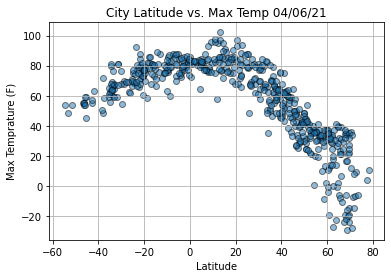

In [53]:
# Extract relevant fields from the DF for plotting 
lats = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Importing time module
import time 

# Build the scatter plot for latitude vs. max temp
plt.scatter(lats,
            max_temp,
            edgecolor="k", linewidths=1, marker="o",
            alpha=0.5, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temp " + time.strftime("%x"))
plt.ylabel("Max Temprature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# save figure
plt.savefig("weather_data/Fig1.png")

plt.show()

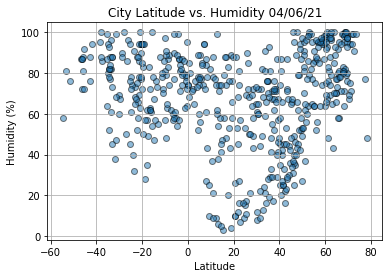

In [55]:
# Build scatter plots for latitude VS humidity
plt.scatter(lats,
            humidity,
            edgecolor="k", linewidths=1, marker="o",
            alpha=0.5, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save figure
plt.savefig("weather_data/Fig2.png")

plt.show()

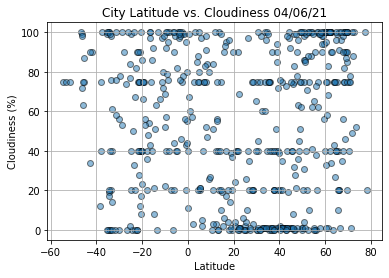

In [57]:
# scatter plot for lat VS cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="k", linewidths=1, marker="o",
            alpha=0.5, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save figure
plt.savefig("weather_data/Fig3.png")

plt.show()

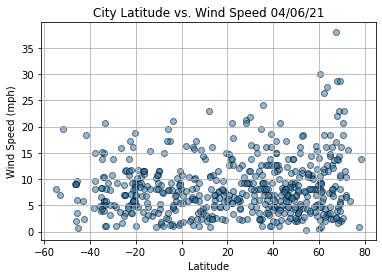

In [59]:
# scatter plot for lat VS Wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="k", linewidths=1, marker="o",
            alpha=0.5, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# save figure
plt.savefig("weather_data/Fig4.png")

plt.show()